In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('titanic.csv')

In [21]:
# 1- Calcule a diferença na tarifa média e mediana paga pelos que sobreviveram e pelos que morreram. Qual grupo pagou uma tarifa média e mediana mais alta?

media_fare = df.groupby('Survived')['Fare'].mean()
mediana_fare = df.groupby('Survived')['Fare'].median()

print(f"Média de tarifa dos sobreviventes:\n{media_fare}")
print(f"Mediana de tarifa dos sobreviventes:\n{mediana_fare}")

Média de tarifa dos sobreviventes:
Survived
0     49.561839
1    128.505417
Name: Fare, dtype: float64
Mediana de tarifa dos sobreviventes:
Survived
0    10.48125
1    26.40000
Name: Fare, dtype: float64


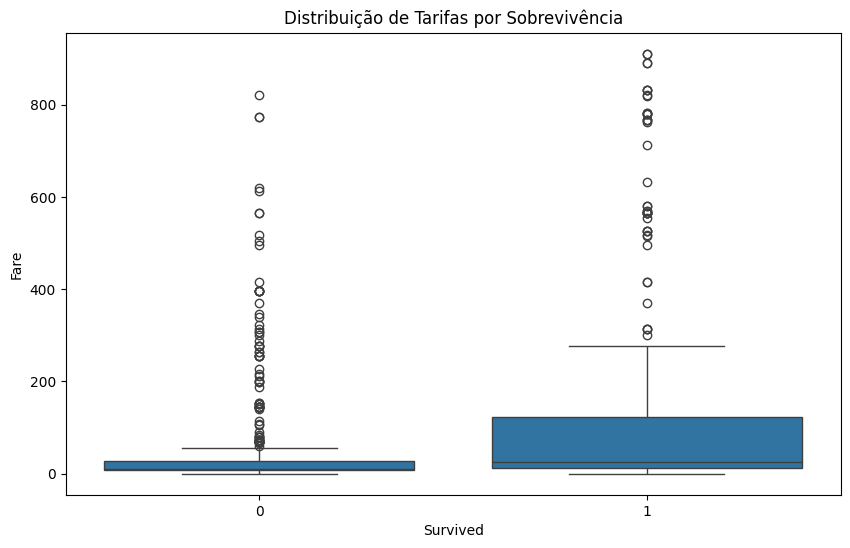

In [20]:
# 2- Crie gráficos boxplot relacionando as variáveis de tarifas e sobrevivência. Agora que você pode ver a distribuição dos dados, as diferenças médias/medianas parecem relativamente pequenas ou grandes?

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Distribuição de Tarifas por Sobrevivência')
plt.show()

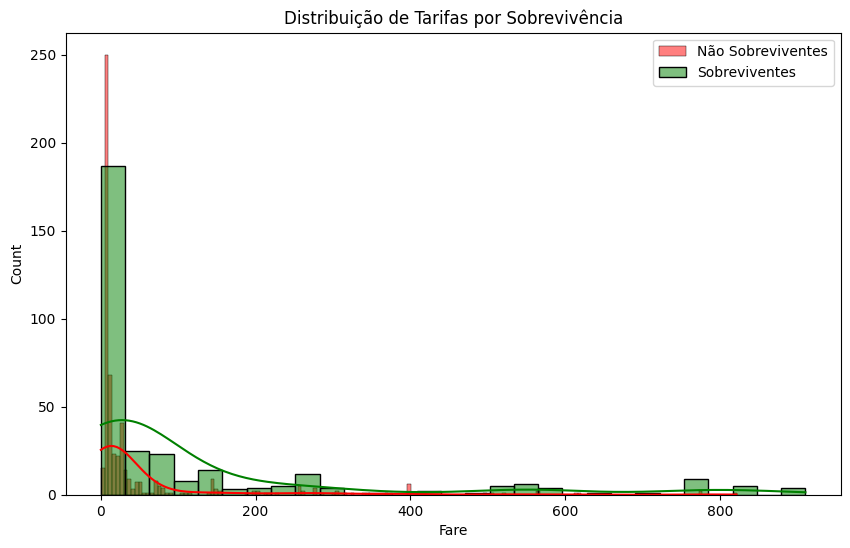

In [11]:
# 3- Crie histogramas sobrepostos de tarifas por sobrevivência. Isso fornece alguma informação adicional?

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 0]['Fare'], color='red', label='Não Sobreviventes', kde=True)
sns.histplot(df[df['Survived'] == 1]['Fare'], color='green', label='Sobreviventes', kde=True)
plt.title('Distribuição de Tarifas por Sobrevivência')
plt.legend()
plt.show()

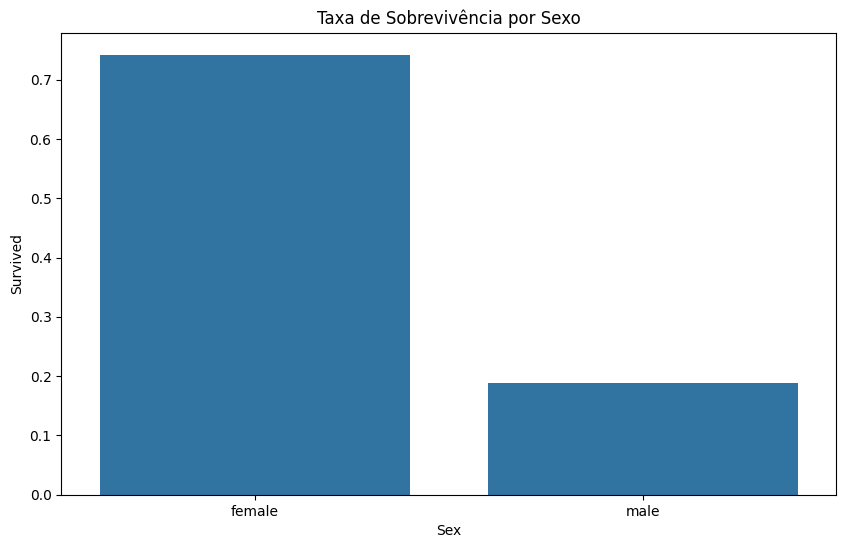

In [12]:
# 4- Qual a proporção de sobreviventes entre homens e mulheres? Apresente os resultados em forma de gráfico de barras.

sobrevivencia_sexo = df.groupby('Sex')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=sobrevivencia_sexo)
plt.title('Taxa de Sobrevivência por Sexo')
plt.show()

In [13]:
# 5- Qual a idade média dos passageiros por classe (Pclass)? Alguma classe apresenta um grupo significativamente mais jovem?

idade_media_classe = df.groupby('Pclass')['Age'].mean()
print(f"Idade média por classe:\n{idade_media_classe}")

Idade média por classe:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [14]:
# 6- Quantos passageiros embarcaram em cada um dos portos (Embarked) e qual foi a taxa de sobrevivência em cada porto?

portos = df['Embarked'].value_counts()
sobrevivencia_porto = df.groupby('Embarked')['Survived'].mean()
print(f"Passageiros por porto:\n{portos}")
print(f"Taxa de sobrevivência por porto:\n{sobrevivencia_porto}")

Passageiros por porto:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Taxa de sobrevivência por porto:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [15]:
# 7- Crie uma nova coluna chamada FaixaEtaria que classifique os passageiros em:

# Criança (idade < 12),
# Adolescente (12–17),
# Adulto (18–59),
# Idoso (60+).

# Em seguida, calcule a taxa de sobrevivência para cada faixa etária.

def faixa_etaria(idade):
    if idade < 12:
        return 'Criança'
    elif idade < 18:
        return 'Adolescente'
    elif idade < 60:
        return 'Adulto'
    else:
        return 'Idoso'

# Adicionando coluna FaixaEtaria

df['FaixaEtaria'] = df['Age'].apply(faixa_etaria)
sobrevivencia_faixa = df.groupby('FaixaEtaria')['Survived'].mean()
print(f"Taxa de sobrevivência por faixa etária:\n{sobrevivencia_faixa}")

Taxa de sobrevivência por faixa etária:
FaixaEtaria
Adolescente    0.488889
Adulto         0.386087
Criança        0.573529
Idoso          0.290640
Name: Survived, dtype: float64


In [16]:
# 8- Qual o ticket médio (Fare) pago por passageiros em cada classe (Pclass)? Existe uma relação entre o valor pago e a sobrevivência?

ticket_medio = df.groupby('Pclass')['Fare'].mean()
print(f"Ticket médio por classe:\n{ticket_medio}")

Ticket médio por classe:
Pclass
1    219.548497
2     37.447511
3     39.377176
Name: Fare, dtype: float64


In [17]:
# 9- Quantos passageiros estavam viajando sozinhos (ou seja, SibSp = 0 e Parch = 0)? Qual foi a taxa de sobrevivência desse grupo comparada aos que estavam acompanhados?

viajando_sozinho = df[(df['SibSp'] == 0) & (df['Parch'] == 0)]
taxa_sobrevivencia_sozinho = viajando_sozinho['Survived'].mean()
taxa_sobrevivencia_acompanhado = df[~((df['SibSp'] == 0) & (df['Parch'] == 0))]['Survived'].mean()

print(f"Taxa de sobrevivência dos que viajavam sozinhos: {taxa_sobrevivencia_sozinho}")
print(f"Taxa de sobrevivência dos que estavam acompanhados: {taxa_sobrevivencia_acompanhado}")

Taxa de sobrevivência dos que viajavam sozinhos: 0.30353817504655495
Taxa de sobrevivência dos que estavam acompanhados: 0.5056497175141242


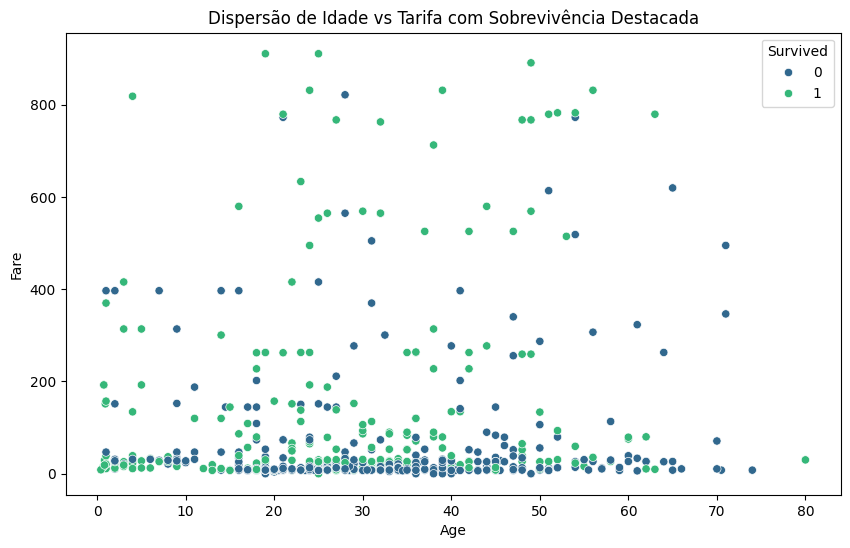

In [18]:
# 10- Crie um gráfico de dispersão (scatter plot) relacionando idade e tarifa paga (Fare), destacando os sobreviventes com uma cor diferente.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='viridis')
plt.title('Dispersão de Idade vs Tarifa com Sobrevivência Destacada')
plt.show()